In [1]:
# directly get the wine quality csv from the web
# -O(capital) means save the file with the same name as in the URL

!curl -O https://media.geeksforgeeks.org/wp-content/uploads/20250731152112425017/WineQT.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 21 78057   21 17013    0     0  14384      0  0:00:05  0:00:01  0:00:04 14430
100 78057  100 78057    0     0  50526      0  0:00:01  0:00:01 --:--:-- 50620


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


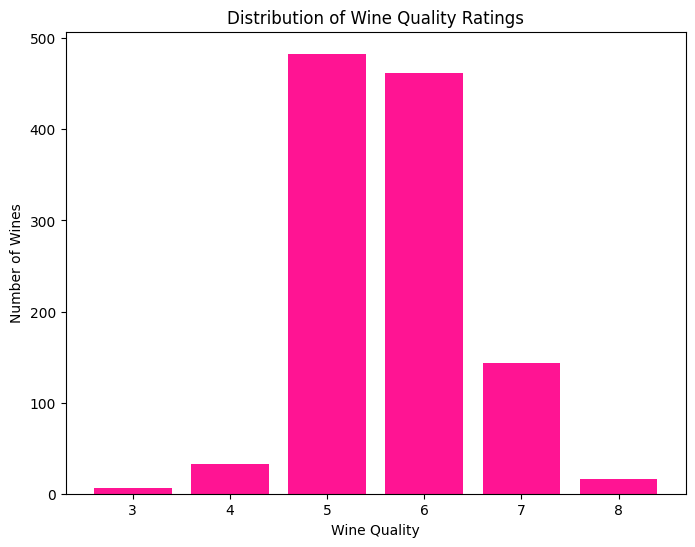

In [4]:
quality_counts = df['quality'].value_counts() #(.value_counts()) how many times each unique value appears in that column

plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts.values, color='deeppink')
plt.xlabel('Wine Quality')
plt.ylabel('Number of Wines')
plt.title('Distribution of Wine Quality Ratings')
plt.show()

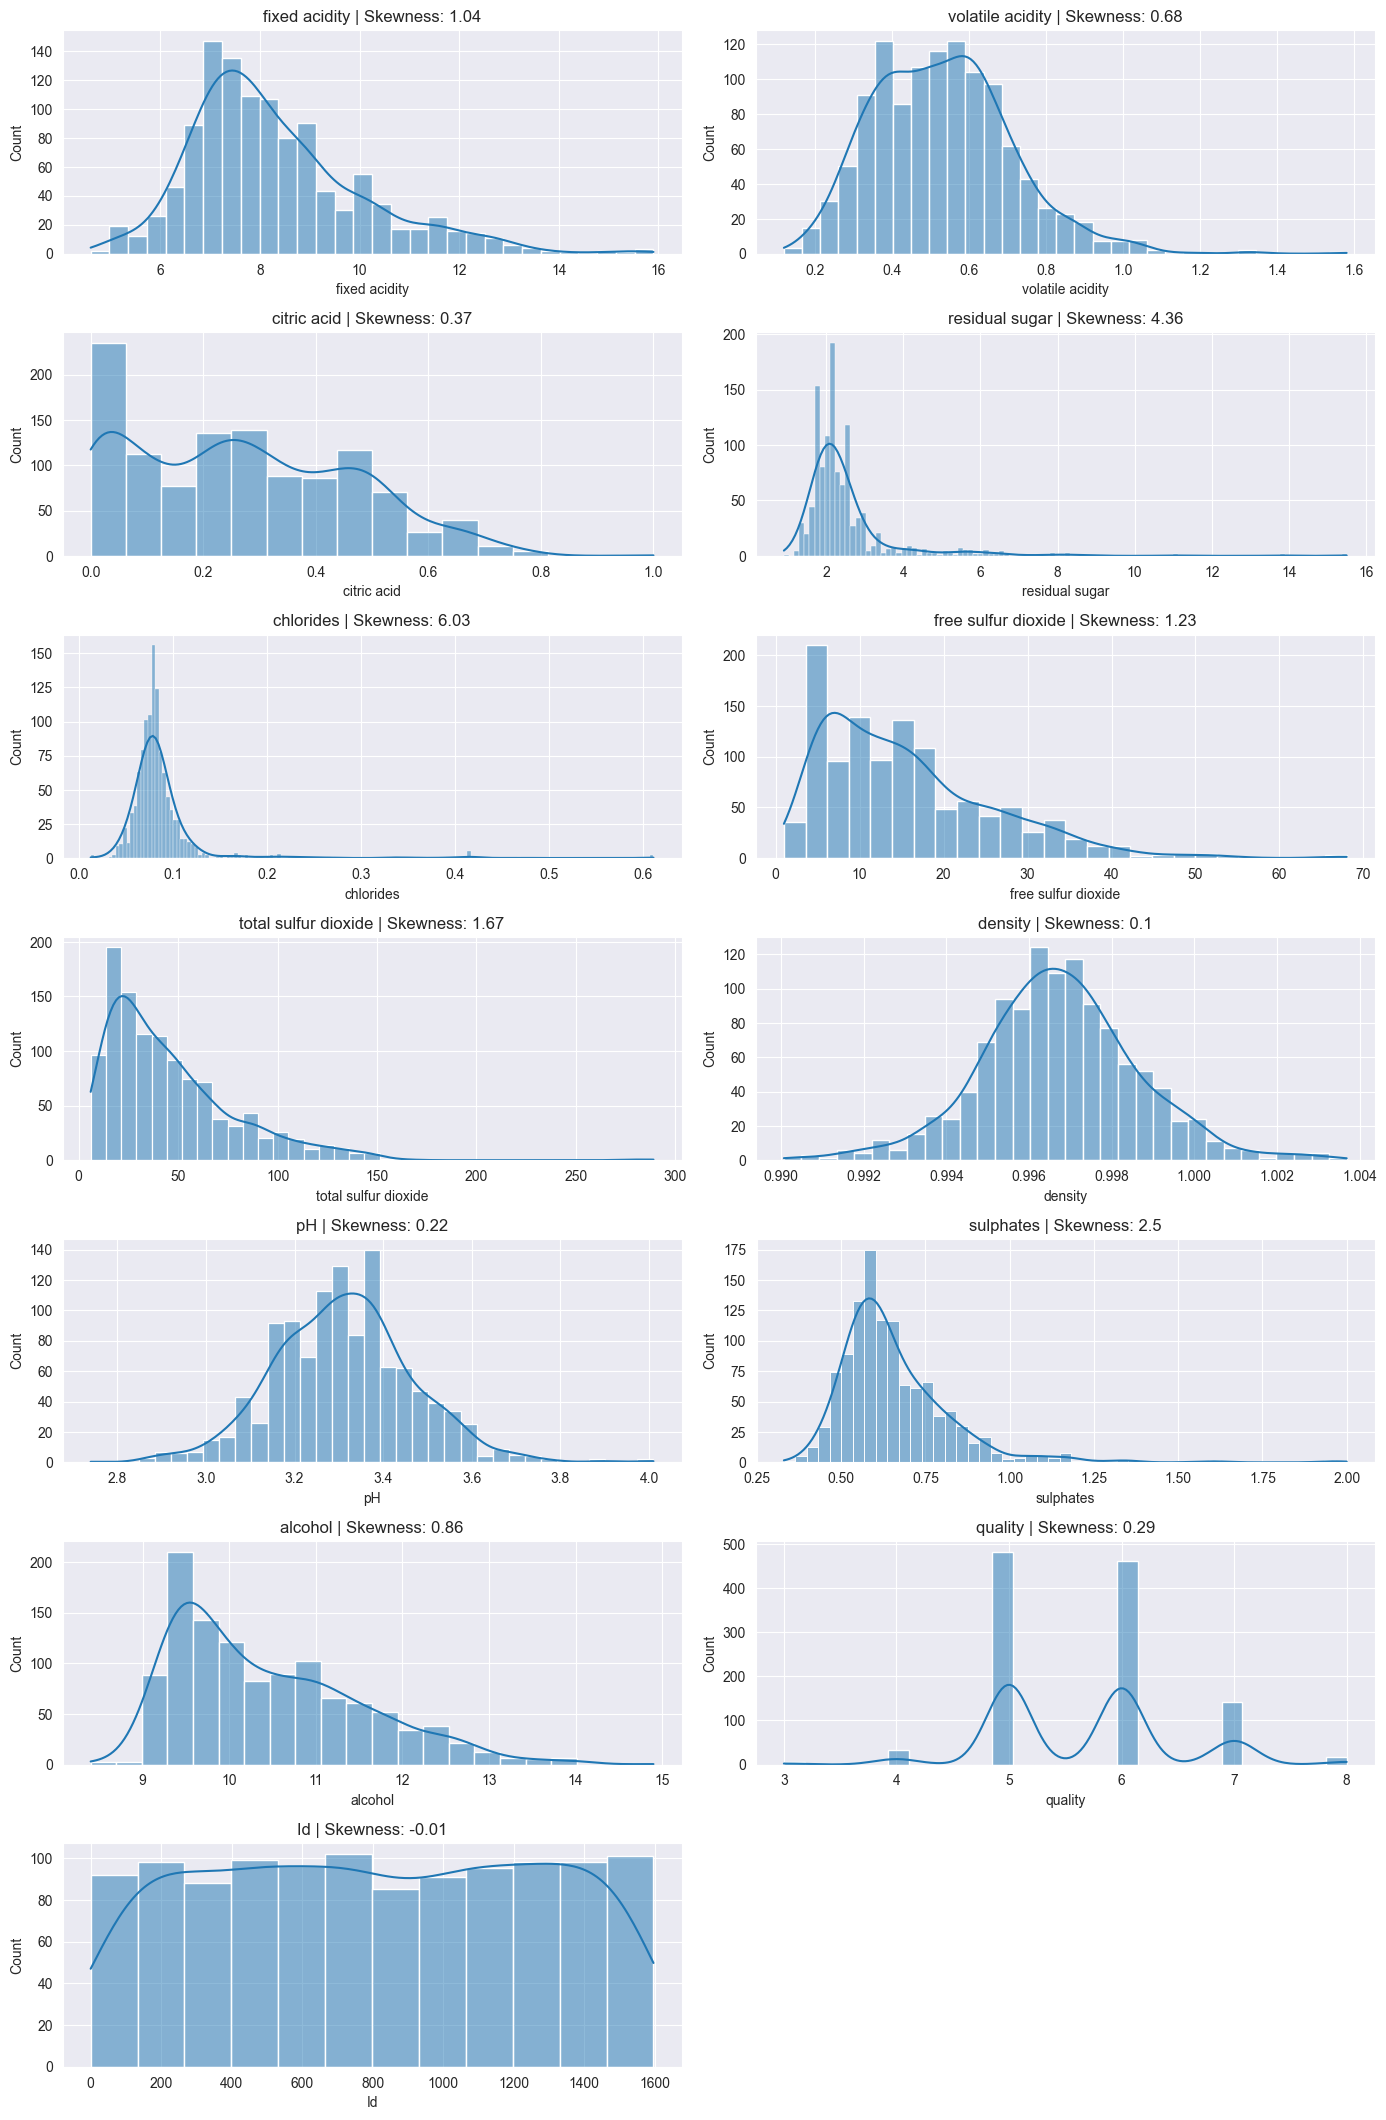

In [5]:
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_20840\2757741509.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="quality", y="alcohol", data=df, palette='viridis')
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 38.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


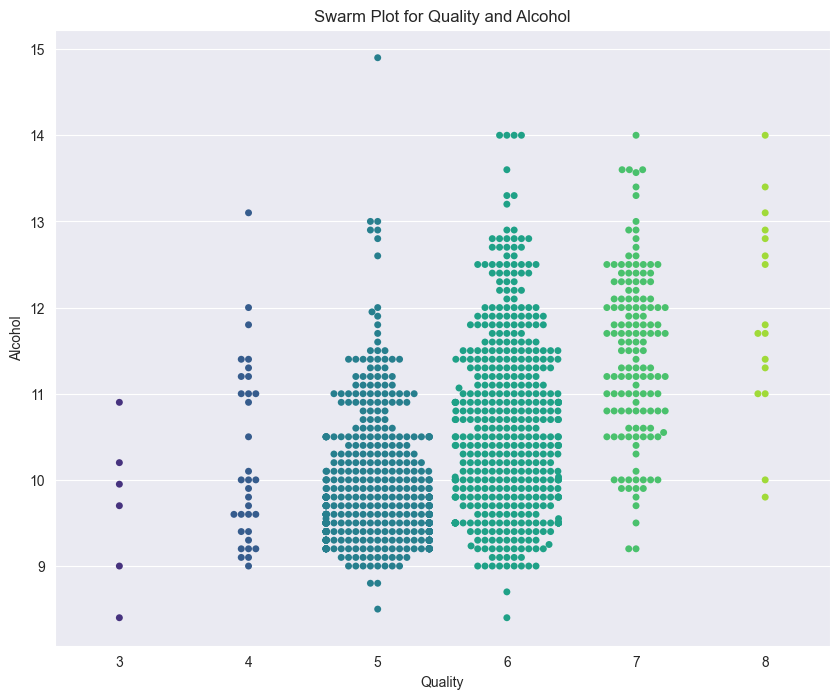

In [6]:
plt.figure(figsize=(10, 8))

sns.swarmplot(x="quality", y="alcohol", data=df, palette='viridis')

plt.title('Swarm Plot for Quality and Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

<Figure size 1000x600 with 0 Axes>

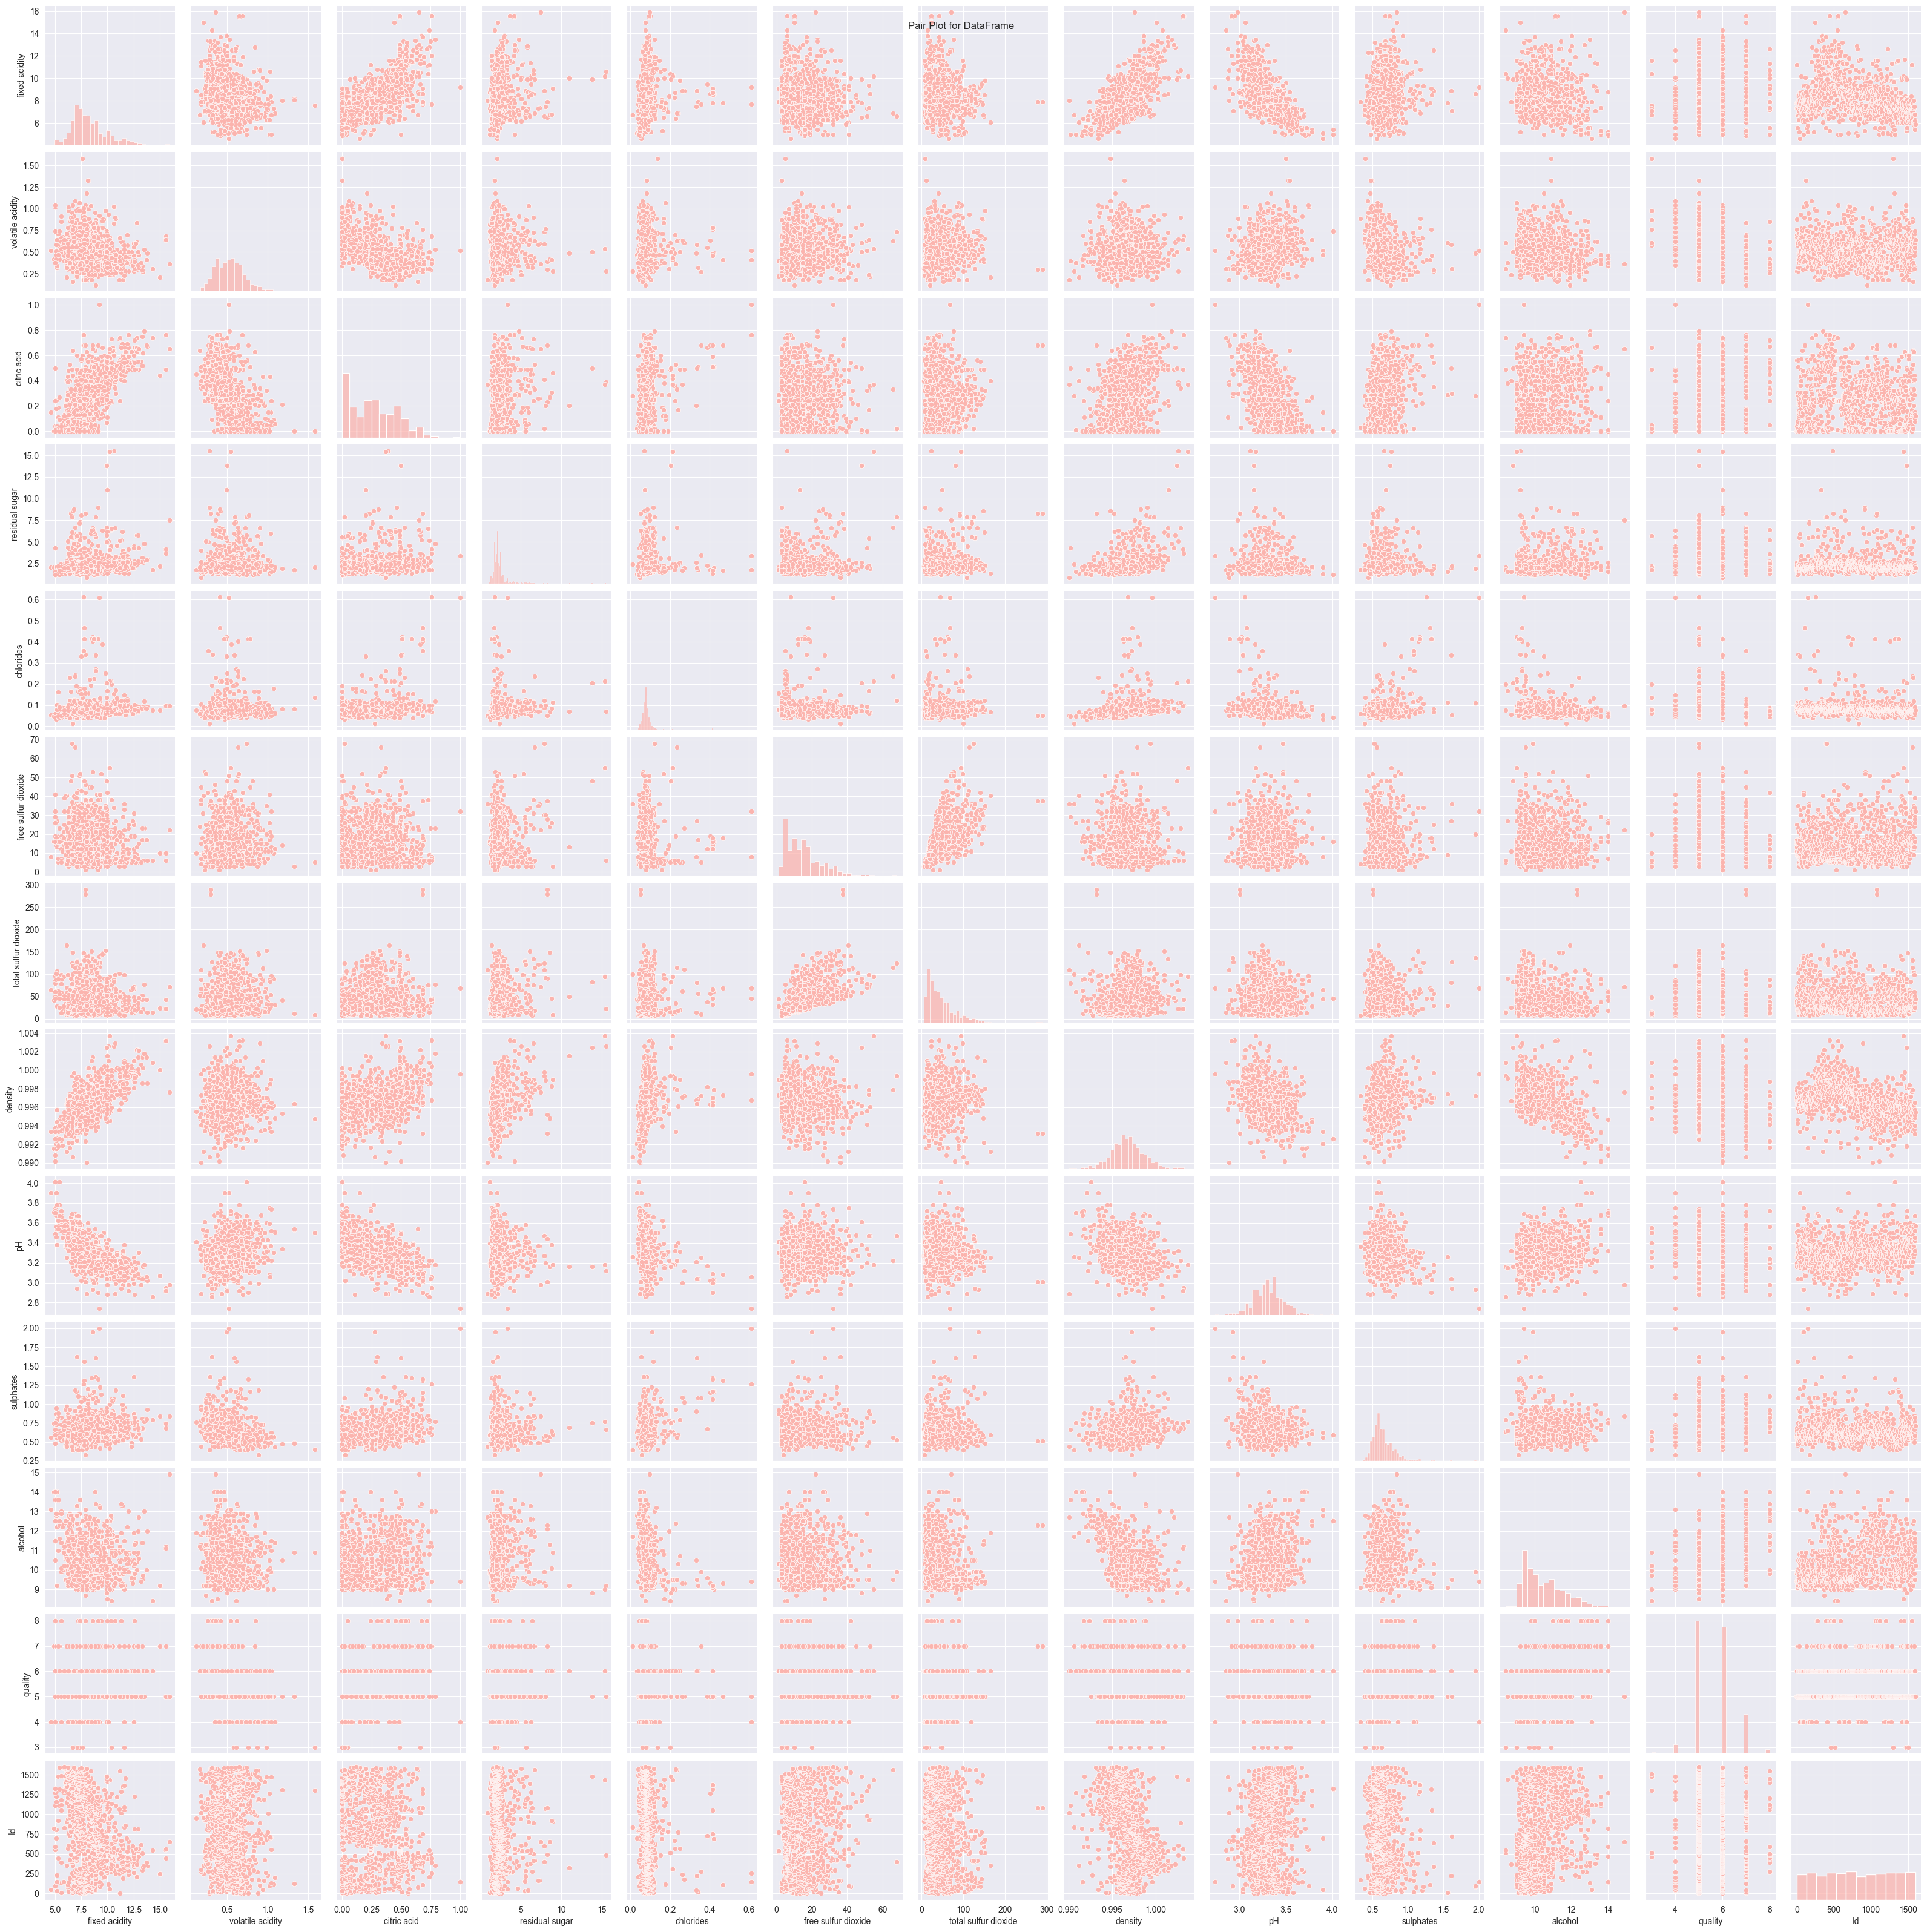

In [7]:
sns.set_palette("Pastel1")

plt.figure(figsize=(10, 6))

sns.pairplot(df)

plt.suptitle('Pair Plot for DataFrame')
plt.show()

<Axes: xlabel='quality', ylabel='alcohol'>

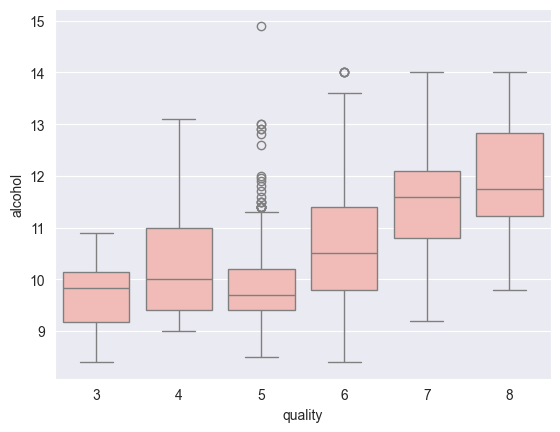

In [8]:
sns.boxplot(x='quality', y='alcohol', data=df)

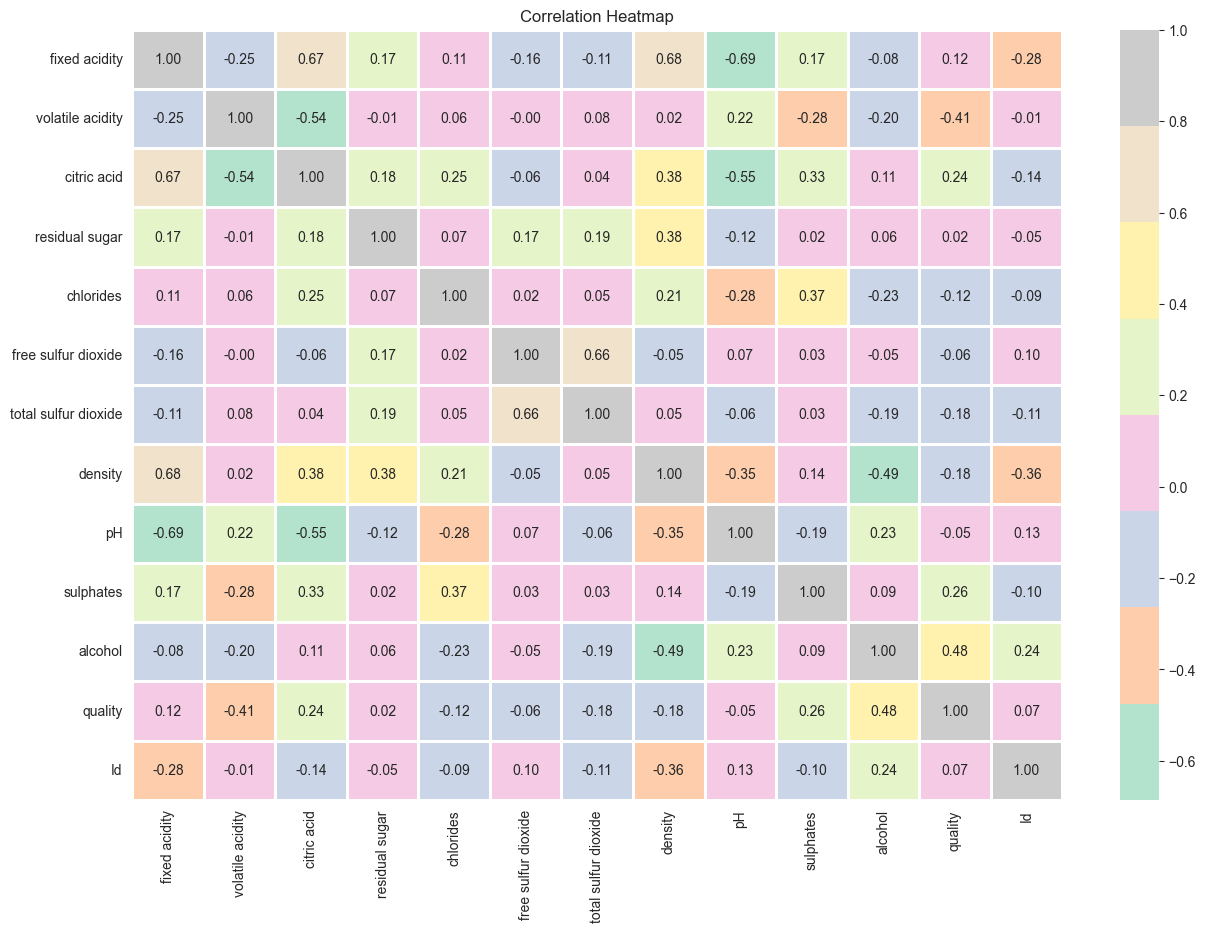

In [12]:
plt.figure(figsize=(15, 10))

sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

In [1]:
## Linear Regression Model
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)  # "seed" gives same random values
                    # np.random.rand() gives different numbers each run
X = 100 * np.random.rand(50, 1)  #generates a 50×1 matrix of random numbers between 0 and 1.
y = 3 * X + 10 + np.random.randn(50, 1) * 10  
#Generates random numbers from a normal (Gaussian) distribution with:
#mean = 0
#standard deviation = 1
#Multiplies the noise by 10, making it larger (more spread out).
#So the data is more realistic — not a perfect line, but a noisy linear dataset

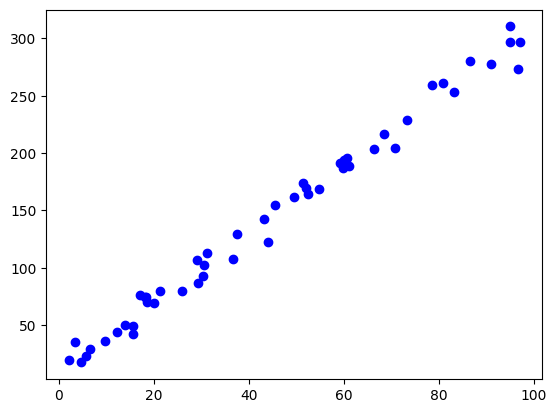

In [6]:
# plot the data points
plt.scatter(X, y, color='blue', label='Data Points')

In [7]:
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
Y_pred = model.predict(X)

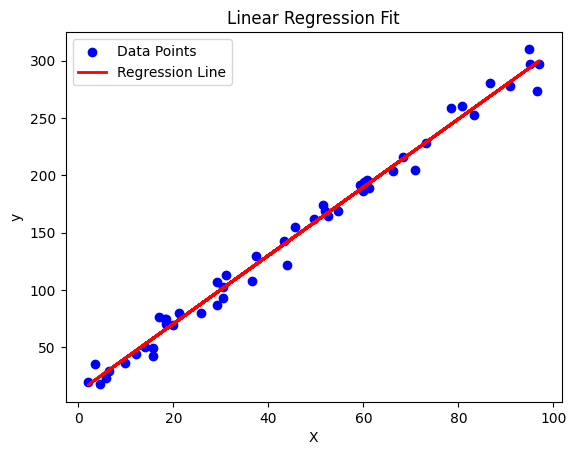

In [9]:
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [10]:
# Predicting a new value
new_X = np.array([[200]])
predicted_y = model.predict(new_X)
print(f"Predicted value for X=200: {predicted_y[0][0]}")

Predicted value for X=200: 606.498212821751


In [11]:
model.intercept_, model.coef_

(array([10.96689274]), array([[2.9776566]]))